In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.datasets import get_rdataset

In [2]:
df = pd.read_csv('PRSA_Data_Dingling_20130301-20170228.csv')
df

,No,year,month,day,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station
0,1,2013,3,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling
1,2,2013,3,1,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling
2,3,2013,3,1,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling
3,4,2013,3,1,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling
4,5,2013,3,1,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,2017,2,28,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling
35060,35061,2017,2,28,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling
35061,35062,2017,2,28,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling
35062,35063,2017,2,28,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling


In [3]:
df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5       779
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [4]:
df['PM2.5'] = df['PM2.5'].fillna(df['PM2.5'].mean())

In [5]:
df.isnull().sum()

No            0
year          0
month         0
day           0
hour          0
PM2.5         0
PM10        656
SO2         730
NO2        1234
CO         2012
O3         1214
TEMP         53
PRES         50
DEWP         53
RAIN         51
wd          140
WSPM         43
station       0
dtype: int64

In [6]:
df['data'] = pd.to_datetime(df['year'].astype('str') + '-' + df['month'].astype('str') + '-' + df['day'].astype('str'))
del df['year']
del df['month']
del df['day']
df

,No,hour,PM2.5,PM10,SO2,NO2,CO,O3,TEMP,PRES,DEWP,RAIN,wd,WSPM,station,data
0,1,0,4.0,4.0,3.0,NaN,200.0,82.0,-2.3,1020.8,-19.7,0.0,E,0.5,Dingling,2013-03-01
1,2,1,7.0,7.0,3.0,NaN,200.0,80.0,-2.5,1021.3,-19.0,0.0,ENE,0.7,Dingling,2013-03-01
2,3,2,5.0,5.0,3.0,2.0,200.0,79.0,-3.0,1021.3,-19.9,0.0,ENE,0.2,Dingling,2013-03-01
3,4,3,6.0,6.0,3.0,NaN,200.0,79.0,-3.6,1021.8,-19.1,0.0,NNE,1.0,Dingling,2013-03-01
4,5,4,5.0,5.0,3.0,NaN,200.0,81.0,-3.5,1022.3,-19.4,0.0,N,2.1,Dingling,2013-03-01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
35059,35060,19,11.0,11.0,2.0,2.0,200.0,99.0,11.7,1008.9,-13.3,0.0,NNE,1.3,Dingling,2017-02-28
35060,35061,20,13.0,13.0,2.0,2.0,200.0,101.0,10.9,1009.0,-14.0,0.0,N,2.1,Dingling,2017-02-28
35061,35062,21,9.0,14.0,2.0,2.0,200.0,102.0,9.5,1009.4,-13.0,0.0,N,1.5,Dingling,2017-02-28
35062,35063,22,10.0,12.0,2.0,2.0,200.0,97.0,7.8,1009.6,-12.6,0.0,NW,1.4,Dingling,2017-02-28


In [7]:
df['month'] = df['data'].dt.to_period('M')
df_pm = df.groupby('month')['PM2.5'].mean()
df_pm.index = df_pm.index.to_timestamp()
df_pm

month
2013-03-01     95.705645
2013-04-01     55.401199
2013-05-01     71.125808
2013-06-01     85.412442
2013-07-01     54.560004
2013-08-01     49.791667
2013-09-01     63.198553
2013-10-01     73.158037
2013-11-01     47.306944
2013-12-01     51.862889
2014-01-01     71.083009
2014-02-01    142.427759
2014-03-01     83.372298
2014-04-01     86.738510
2014-05-01     47.670155
2014-06-01     41.200864
2014-07-01     78.471011
2014-08-01     52.044093
2014-09-01     54.508904
2014-10-01    116.192021
2014-11-01     71.484401
2014-12-01     47.478297
2015-01-01     85.389453
2015-02-01     81.007440
2015-03-01     74.724109
2015-04-01     56.374576
2015-05-01     46.267374
2015-06-01     50.637178
2015-07-01     49.486559
2015-08-01     35.321138
2015-09-01     38.669269
2015-10-01     53.521322
2015-11-01     84.962310
2015-12-01    119.855844
2016-01-01     54.042700
2016-02-01     35.662205
2016-03-01     82.103311
2016-04-01     60.626112
2016-05-01     51.109834
2016-06-01     49.2

In [8]:
df_pm.isnull().sum()

np.int64(0)

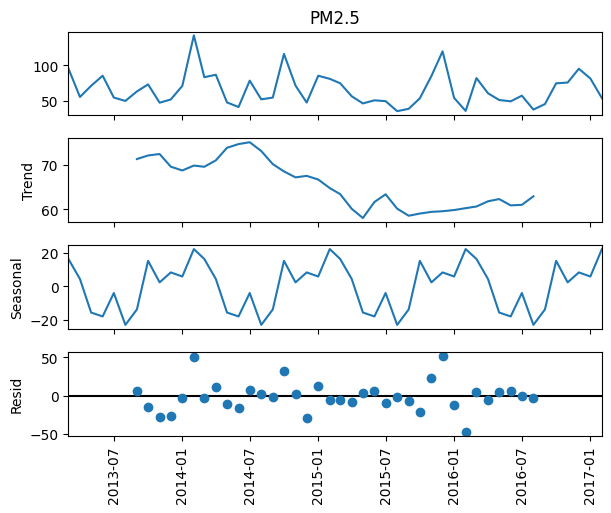

In [9]:
from statsmodels.tsa.seasonal import seasonal_decompose


decompose = seasonal_decompose(df_pm)
decompose.plot()
plt.xticks(rotation=90)
plt.show()

In [10]:
from statsmodels.tsa.stattools import adfuller

result = adfuller(df_pm)
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Критические значения:', result[4])
if result[1] < 0.05:
 print("Временной ряд стационарен")
else:
 print("Временной ряд нестационарный")

ADF Statistic: -5.469042799775015
p-value: 2.421893705419117e-06
Критические значения: {'1%': np.float64(-3.5778480370438146), '5%': np.float64(-2.925338105429433), '10%': np.float64(-2.6007735310095064)}
Временной ряд стационарен


In [11]:
#разбиваем данные на тестовую часть и часть для обучения
train_size = int(len(df_pm) * 0.8)
train, test = df_pm[0:train_size], df_pm[train_size:]
train

month
2013-03-01     95.705645
2013-04-01     55.401199
2013-05-01     71.125808
2013-06-01     85.412442
2013-07-01     54.560004
2013-08-01     49.791667
2013-09-01     63.198553
2013-10-01     73.158037
2013-11-01     47.306944
2013-12-01     51.862889
2014-01-01     71.083009
2014-02-01    142.427759
2014-03-01     83.372298
2014-04-01     86.738510
2014-05-01     47.670155
2014-06-01     41.200864
2014-07-01     78.471011
2014-08-01     52.044093
2014-09-01     54.508904
2014-10-01    116.192021
2014-11-01     71.484401
2014-12-01     47.478297
2015-01-01     85.389453
2015-02-01     81.007440
2015-03-01     74.724109
2015-04-01     56.374576
2015-05-01     46.267374
2015-06-01     50.637178
2015-07-01     49.486559
2015-08-01     35.321138
2015-09-01     38.669269
2015-10-01     53.521322
2015-11-01     84.962310
2015-12-01    119.855844
2016-01-01     54.042700
2016-02-01     35.662205
2016-03-01     82.103311
2016-04-01     60.626112
Freq: MS, Name: PM2.5, dtype: float64

In [12]:
print(train.describe())
print(test.describe())

count     38.000000
mean      67.074879
std       24.051755
min       35.321138
25%       50.003045
50%       58.500344
75%       81.829343
max      142.427759
Name: PM2.5, dtype: float64
count    10.000000
mean     62.149248
std      18.507698
min      37.589913
25%      49.699312
50%      55.495867
75%      75.481717
max      95.278113
Name: PM2.5, dtype: float64


In [14]:
import numpy as np

train_log = np.log(train)
train_log_diff = train_log.diff().dropna()

In [15]:
from statsmodels.tsa.arima.model import ARIMA

# Подбор модели ARIMA
model = ARIMA(train, order=(13, 1, 0))
model_fit = model.fit()
model_fit

# Сделать прогнозы
predictions = model_fit.forecast(steps=len(test))
predictions

2016-05-01    35.568979
2016-06-01    46.179614
2016-07-01    52.338576
2016-08-01    65.093784
2016-09-01    58.014816
2016-10-01    45.320507
2016-11-01    74.563290
2016-12-01    84.153793
2017-01-01    74.470927
2017-02-01    58.448317
Freq: MS, Name: predicted_mean, dtype: float64

Среднеквадратичная ошибка: 224.9673568600534
Root Mean Squared Error: 14.998911855866524


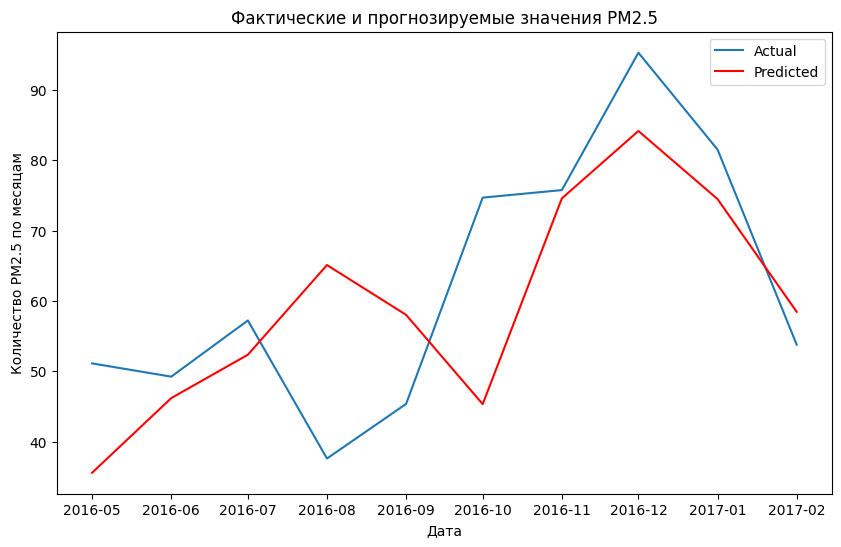

In [16]:
from sklearn.metrics import mean_squared_error
from math import sqrt

# Вычислить MSE
mse = mean_squared_error(test, predictions)
print('Среднеквадратичная ошибка:', mse)

# Вычислить RMSE
rmse = sqrt(mse)
print('Root Mean Squared Error:', rmse)

# Постройте график сравнения фактических и прогнозируемых значений
plt.figure(figsize=(10, 6))
plt.plot(test.index, test, label='Actual')
plt.plot(test.index, predictions, label='Predicted', color='red')
plt.title('Фактические и прогнозируемые значения PM2.5')
plt.xlabel('Дата')
plt.ylabel('Количество PM2.5 по месяцам')
plt.legend()
plt.show()

C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


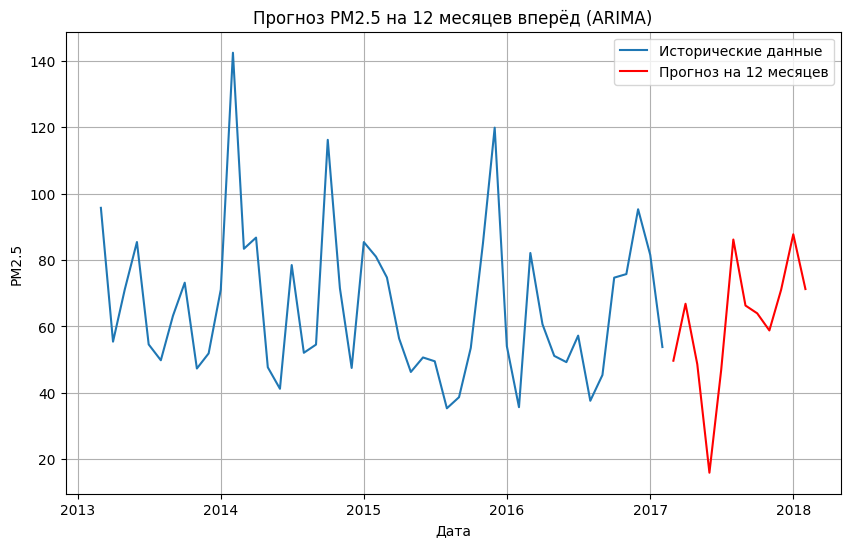

In [17]:
# Обучаем модель на всем ряде
model = ARIMA(df_pm, order=(22, 1, 0))
model_fit = model.fit()
forecast_arima = model_fit.forecast(steps=12)

# Построение графика
plt.figure(figsize=(10, 6))
plt.plot(df_pm.index, df_pm, label='Исторические данные')
plt.plot(forecast_arima, label='Прогноз на 12 месяцев', color='red')
plt.title('Прогноз PM2.5 на 12 месяцев вперёд (ARIMA)')
plt.xlabel('Дата')
plt.ylabel('PM2.5')
plt.legend()
plt.grid()
plt.show()

C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


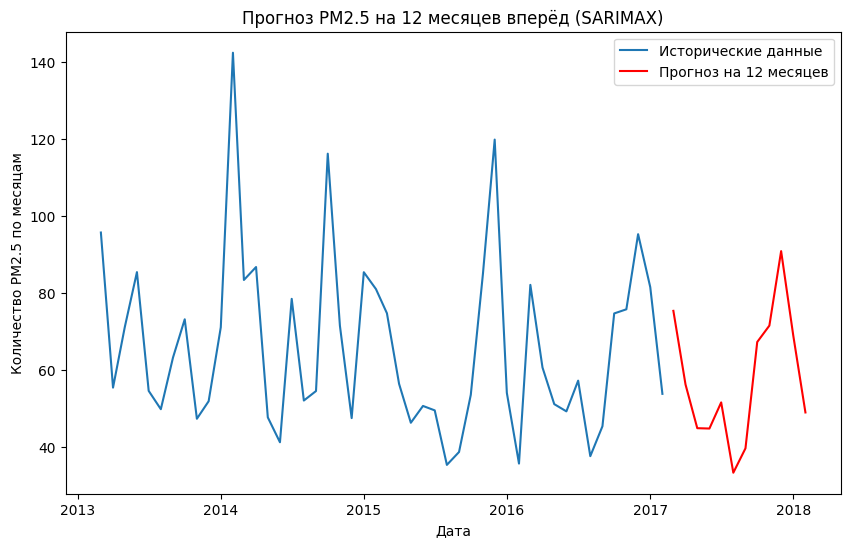

In [18]:
from statsmodels.tsa.statespace.sarimax import SARIMAX

model = SARIMAX(df_pm, order = (1, 1, 1), seasonal_order = (1, 1, 1, 12))

#3
model_fit = model.fit()
# print(model_fit.summary())

#4
forecast_sarima = model_fit.forecast(steps = 12)


# Постройте график результатов
df_pm.index = pd.to_datetime(df_pm.index)

plt.figure(figsize=(10, 6))
plt.plot(df_pm, label='Исторические данные')
plt.plot(forecast_sarima, label='Прогноз на 12 месяцев', color='red')
plt.title('Прогноз PM2.5 на 12 месяцев вперёд (SARIMAX)')
plt.xlabel('Дата')
plt.ylabel('Количество PM2.5 по месяцам')
plt.legend()
plt.show()

In [ ]:
Прогноз на 12 месяцев вперёд (PROPHET)

In [19]:
from prophet import Prophet

# Преобразуем Series в DataFrame
df_pm = df_pm.reset_index()  # сбрасываем индекс, чтобы дата стала обычной колонкой
df_pm.columns = ['ds', 'y']  # Переименовываем колонки в 'ds' и 'y'

print(df_pm.head())

C:\Users\user\AppData\Local\Programs\Python\Python313\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
Importing plotly failed. Interactive plots will not work.


          ds          y
0 2013-03-01  95.705645
1 2013-04-01  55.401199
2 2013-05-01  71.125808
3 2013-06-01  85.412442
4 2013-07-01  54.560004


In [20]:
df_pm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48 entries, 0 to 47
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   ds      48 non-null     datetime64[ns]
 1   y       48 non-null     float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 900.0 bytes


23:06:56 - cmdstanpy - INFO - Chain [1] start processing
23:06:57 - cmdstanpy - INFO - Chain [1] done processing


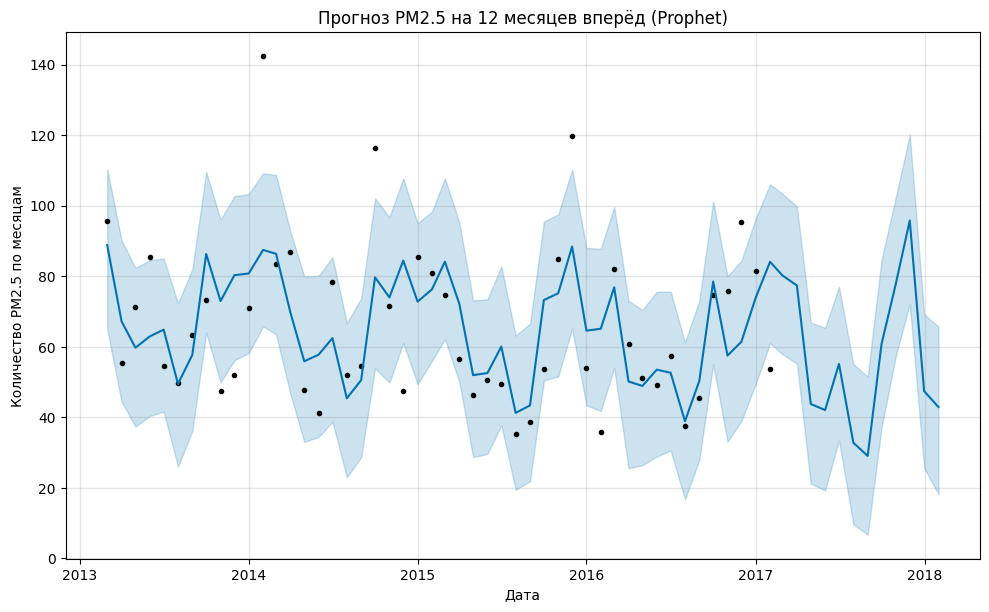

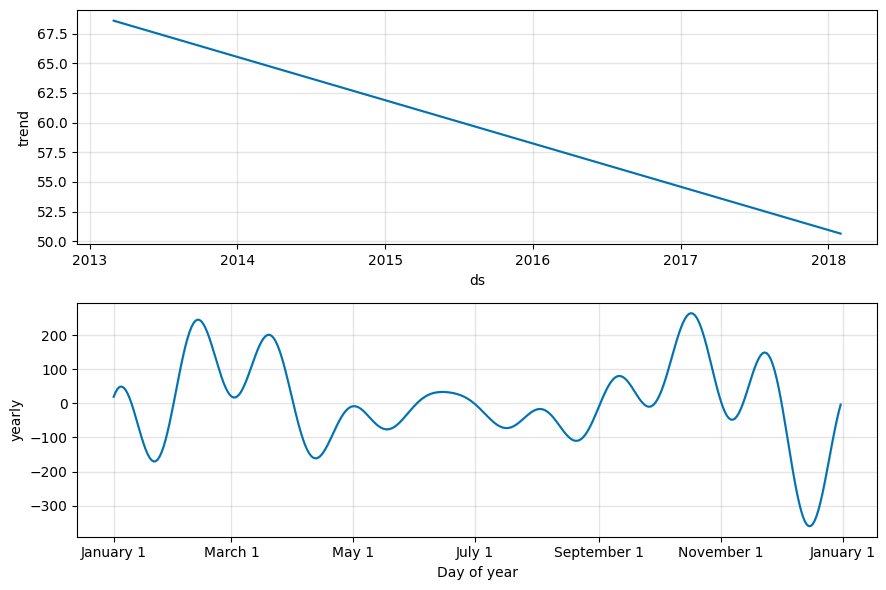

In [21]:
# Создаем экземпляр Prophet
model = Prophet()
# Подгонка модели к данным
model.fit(df_pm)

# Создаем фрейм данных для хранения прогнозов
future = model.make_future_dataframe(periods=12, freq='ME') # Прогнозирование на 12 месяцев вперед
# Делаем прогнозы
forecast_prophet = model.predict(future)

# Преобразуем результат в DataFrame (если он не в таком формате)
forecast_prophet = pd.DataFrame(forecast_prophet)

# # Получаем только прогноз на 12 месяцев
# forecast_prophet_12 = forecast_prophet.tail(12)

# Построить график прогноза
fig1 = model.plot(forecast_prophet)
plt.title('Прогноз PM2.5 на 12 месяцев вперёд (Prophet)')
plt.xlabel('Дата')
plt.ylabel('Количество PM2.5 по месяцам')
plt.show()
# Построить график компонентов прогноза
fig2 = model.plot_components(forecast_prophet)
plt.show()

In [22]:
# Просмотрим структуру forecast_prophet
print(forecast_prophet.head())

          ds      trend  yhat_lower  yhat_upper  trend_lower  trend_upper  \
0 2013-03-01  68.589790   64.963472  110.301330    68.589790    68.589790   
1 2013-04-01  68.280340   44.418532   90.175265    68.280340    68.280340   
2 2013-05-01  67.980872   37.342737   82.353079    67.980872    67.980872   
3 2013-06-01  67.671422   40.335548   84.505491    67.671422    67.671422   
4 2013-07-01  67.371954   41.590911   84.964667    67.371954    67.371954   

   additive_terms  additive_terms_lower  additive_terms_upper     yearly  \
0       20.184892             20.184892             20.184892  20.184892   
1       -1.094305             -1.094305             -1.094305  -1.094305   
2       -8.284600             -8.284600             -8.284600  -8.284600   
3       -4.767230             -4.767230             -4.767230  -4.767230   
4       -2.551000             -2.551000             -2.551000  -2.551000   

   yearly_lower  yearly_upper  multiplicative_terms  \
0     20.184892     20.18

In [23]:
# Выводим длину test.index
print(len(test.index))

# Выводим длину каждого прогноза
print(len(forecast_arima))
print(len(forecast_sarima))
print(len(forecast_prophet))

10
12
12
60


In [ ]:
Комбинированный график

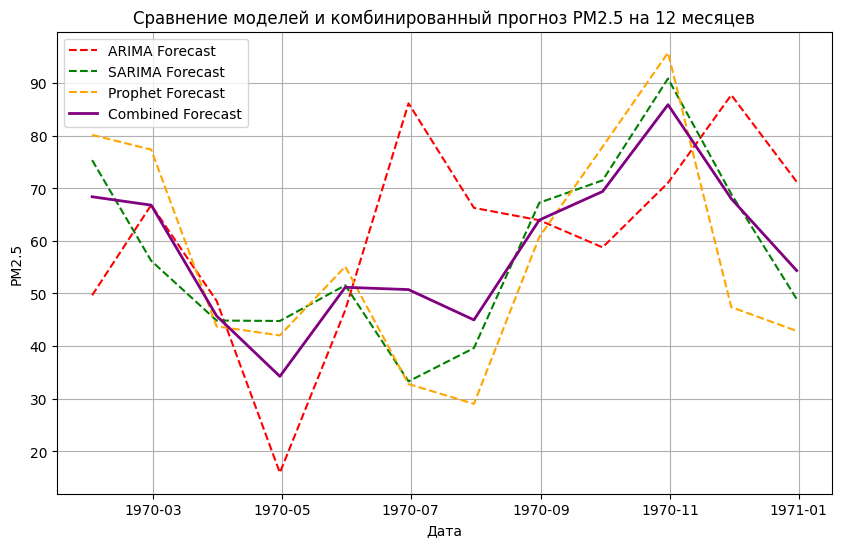

In [25]:
# Преобразуем индекс в даты
df_pm.index = pd.to_datetime(df_pm.index)

# Последняя дата
last_date = df_pm.index.max()

# Прогнозные даты
forecast_dates = pd.date_range(start=last_date + pd.offsets.MonthEnd(1), periods=12, freq='ME')

# Прогнозы от моделей
forecast_arima = np.array(forecast_arima[-12:], dtype=np.float64)
forecast_sarima = np.array(forecast_sarima[-12:], dtype=np.float64)

# Prophet: получаем последние 12 значений прогноза
forecast_prophet = np.array(forecast_prophet['yhat'].iloc[-12:], dtype=np.float64)

# Комбинированный прогноз
combined_predictions = (forecast_arima + forecast_sarima + forecast_prophet) / 3

# График
plt.figure(figsize=(10, 6))
plt.plot(forecast_dates, forecast_arima, label='ARIMA Forecast', linestyle='--', color='red')
plt.plot(forecast_dates, forecast_sarima, label='SARIMA Forecast', linestyle='--', color='green')
plt.plot(forecast_dates, forecast_prophet, label='Prophet Forecast', linestyle='--', color='orange')
plt.plot(forecast_dates, combined_predictions, label='Combined Forecast', linestyle='-', color='purple', linewidth=2)

plt.title('Сравнение моделей и комбинированный прогноз PM2.5 на 12 месяцев')
plt.xlabel('Дата')
plt.ylabel('PM2.5')
plt.legend()
plt.grid(True)
plt.show()
